In [1]:
%matplotlib inline

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from time import perf_counter

from converters import convert_from_file

In [3]:
x_train = convert_from_file('train-images-deskewed.idx3-ubyte')/255.0
y_train = convert_from_file('train-labels.idx1-ubyte')
x_train = x_train.reshape((x_train.shape[0], -1))

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

x_test = convert_from_file('t10k-images-deskewed.idx3-ubyte')/255.0
y_test = convert_from_file('t10k-labels.idx1-ubyte')
x_test = x_test.reshape((x_test.shape[0], -1))

In [4]:
l1_clf = LogisticRegression(
    C=0.1, penalty='l1', solver='saga', tol=0.01, multi_class='ovr'
)
l2_clf = LogisticRegression(
    C=0.1, penalty='l2', solver='saga', tol=0.01, multi_class='ovr'
)
noreg_clf = LogisticRegression(
    penalty='none', solver='saga', tol=0.01, multi_class='ovr'
)

In [5]:
tic = perf_counter()
l1_clf.fit(x_train, y_train)
toc = perf_counter()
sparsity = np.mean(l1_clf.coef_ == 0) * 100
score = l1_clf.score(x_val, y_val) * 100
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("L1 penalty accuracy: %.4f%%" % score)
print("Spent %.4f seconds" % (toc - tic))

Sparsity with L1 penalty: 76.52%
L1 penalty accuracy: 95.0500%
Spent 234.8866 seconds


In [5]:
tic = perf_counter()
l2_clf.fit(x_train, y_train)
toc = perf_counter()
sparsity = np.mean(l2_clf.coef_ == 0) * 100
score = l2_clf.score(x_val, y_val) * 100
print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("L2 penalty accuracy: %.4f%%" % score)
print("Spent %.4f seconds" % (toc - tic))

Sparsity with L2 penalty: 1.40%
L2 penalty accuracy: 95.3000%
Spent 93.4003 seconds


In [7]:
tic = perf_counter()
noreg_clf.fit(x_train, y_train)
toc = perf_counter()
sparsity = np.mean(noreg_clf.coef_ == 0) * 100
score = noreg_clf.score(x_val, y_val) * 100
print("Sparsity with no penalty: %.2f%%" % sparsity)
print("Accuracy: %.4f%%" % score)
print("Spent %.4f seconds" % (toc - tic))

Sparsity with no penalty: 1.40%
Accuracy: 95.2833%
Spent 208.6460 seconds


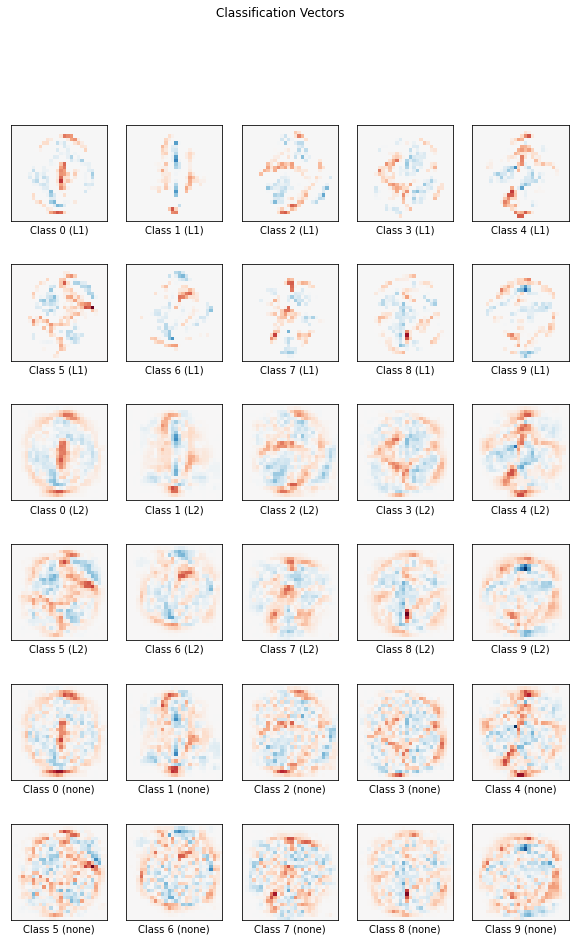

In [9]:
l1_coef = l1_clf.coef_.copy()
plt.figure(figsize=(10, 15))
scale = np.abs(l1_coef).max()
for i in range(10):
    l1_plot = plt.subplot(6, 5, i + 1)
    l1_plot.imshow(l1_coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i (L1)' % i)
l2_coef = l2_clf.coef_.copy()
scale = np.abs(l2_coef).max()
for i in range(10, 20):
    l2_plot = plt.subplot(6, 5, i + 1)
    l2_plot.imshow(l2_coef[i-10].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i (L2)' % (i - 10))
noreg_coef = noreg_clf.coef_.copy()
scale = np.abs(noreg_coef).max()
for i in range(20, 30):
    noreg_plot = plt.subplot(6, 5, i + 1)
    noreg_plot.imshow(noreg_coef[i-20].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    noreg_plot.set_xticks(())
    noreg_plot.set_yticks(())
    noreg_plot.set_xlabel('Class %i (none)' % (i - 20))
plt.suptitle('Classification Vectors')
plt.show()

In [6]:
from sklearn.metrics import classification_report
predictions = l2_clf.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.99      0.98      0.99      1135
           2       0.95      0.94      0.95      1032
           3       0.95      0.96      0.95      1010
           4       0.94      0.96      0.95       982
           5       0.94      0.94      0.94       892
           6       0.97      0.95      0.96       958
           7       0.96      0.95      0.95      1028
           8       0.92      0.94      0.93       974
           9       0.94      0.91      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



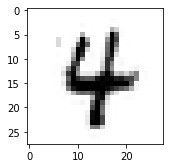

Predicted probabilities:
0: 0.0004%
1: 0.0001%
2: 0.3867%
3: 0.0001%
4: 97.3858%
5: 0.0016%
6: 0.0919%
7: 1.5523%
8: 0.2620%
9: 0.3192%


In [12]:
randindex = np.random.choice(x_test.shape[0], replace=False)
plt.figure(figsize=(2.5, 2.5))
img = plt.subplot()
img.imshow(x_test[randindex].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
proba = l2_clf.predict_proba([x_test[randindex]]).reshape(10)
print('Predicted probabilities:')
for i, value in enumerate(proba):
    print('%d: %.4f%%' % (i, (value * 100)))